In [3]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import datetime 
import seaborn as sns; sns.set()
import matplotlib
import matplotlib.pyplot as plt 
from scipy import stats

In [4]:
#creamos el portafolio
tickers = ['AAPL','FB', 'C', 'DIS']
#ajustamos la ponderacion de cada accion en nuestro portafolio
weights = np.array([.25, .3, .15, .3])


In [8]:
#inversion inicial
initial_investment = 1000000
end = datetime.date.today()
start = datetime.datetime(2010,6,30).isoformat()
stock = pdr.get_data_yahoo(tickers, start=start, end=end)
close = stock["Close"] 



In [10]:
#Calculamos los retornos
returns = close.pct_change()
returns.tail()

Symbols,AAPL,FB,C,DIS
Date,,,,
2020-08-12,0.033234,0.014680,-0.007626,0.009962
2020-08-13,0.017698,0.005425,-0.008622,-0.006298
2020-08-14,-0.000891,-0.000230,0.000756,-0.003284
2020-08-17,-0.002611,-0.000306,-0.028528,-0.008887
2020-08-18,0.008333,0.004518,-0.021003,-0.003478


In [11]:
#generamos la matriz de covarianza
cov_matrix = returns.cov()
cov_matrix

Symbols,AAPL,FB,C,DIS
Symbols,,,,
AAPL,0.000303,0.000159,0.000169,0.000113
FB,0.000159,0.000554,0.000156,0.000111
C,0.000169,0.000156,0.000493,0.000207
DIS,0.000113,0.000111,0.000207,0.000232


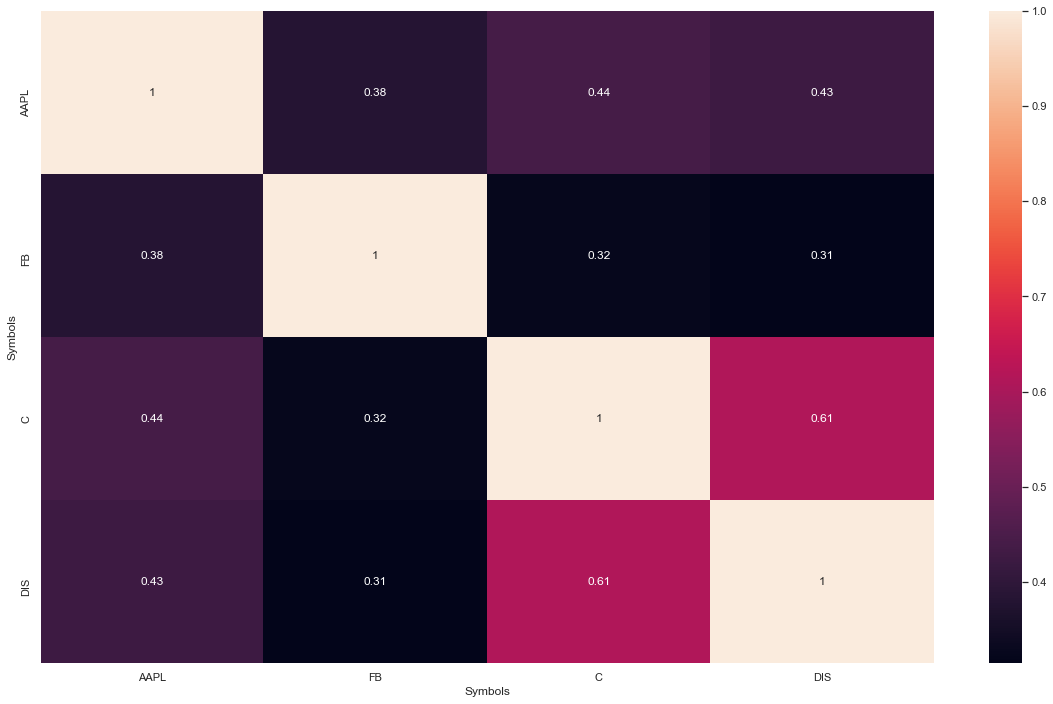

In [12]:
plt.figure(figsize=(20,12)) 
sns.heatmap(returns.corr(), annot=True) #hacemos la matriz de correlacion

In [13]:
avg_rets = returns.mean()
port_mean = avg_rets.dot(weights)
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
mean_investment = (1+port_mean) * initial_investment
stdev_investment = initial_investment * port_stdev

In [14]:
# seleccionamos nuestro intervalo de confianza
conf_level1 = 0.05

# Using SciPy ppf method to generate values for the
# inverse cumulative distribution function to a normal distribution
# Plugging in the mean, standard deviation of our portfolio
# as calculated above
from scipy.stats import norm
cutoff1 = norm.ppf(conf_level1, mean_investment, stdev_investment)

In [15]:
var_1d1 = initial_investment - cutoff1
print("nuestro var del día es:",var_1d1)

nuestro var del día es: 22750.609344221302


1 day VaR @ 95% confidence: 22750.61
2 day VaR @ 95% confidence: 32174.22
3 day VaR @ 95% confidence: 39405.21
4 day VaR @ 95% confidence: 45501.22
5 day VaR @ 95% confidence: 50871.91
6 day VaR @ 95% confidence: 55727.38
7 day VaR @ 95% confidence: 60192.45
8 day VaR @ 95% confidence: 64348.44
9 day VaR @ 95% confidence: 68251.83
10 day VaR @ 95% confidence: 71943.74
11 day VaR @ 95% confidence: 75455.23
12 day VaR @ 95% confidence: 78810.42
13 day VaR @ 95% confidence: 82028.49
14 day VaR @ 95% confidence: 85124.99
15 day VaR @ 95% confidence: 88112.73


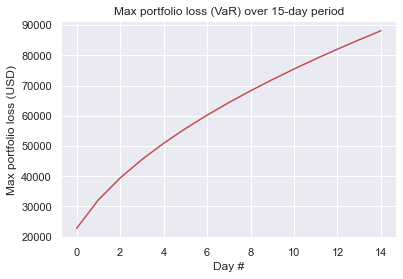

In [16]:
# Calculate n Day VaR
var_array = []
num_days = int(15)
for x in range(1, num_days+1):    
    var_array.append(np.round(var_1d1 * np.sqrt(x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d1 * np.sqrt(x),2)))

# Build plot
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over 15-day period")
plt.plot(var_array, "r")